In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os 
from sklearn.cluster import KMeans
from sklearn import preprocessing
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [97]:
df = pd.read_csv("data/trades.csv")
df = df.ix[:,2:5] #only select hyperparameters

min_max_scaler = preprocessing.MinMaxScaler() #scale the data [0,1]
df_scaled = min_max_scaler.fit_transform(df)
df_scaled

array([[ 0.38461538,  0.35      ,  0.94936709],
       [ 0.88811189,  0.1125    ,  0.83544304],
       [ 0.93006993,  0.725     ,  0.65822785],
       ..., 
       [ 0.05944056,  0.1625    ,  0.41772152],
       [ 0.18531469,  0.4       ,  0.43037975],
       [ 0.02447552,  0.1125    ,  0.10126582]])

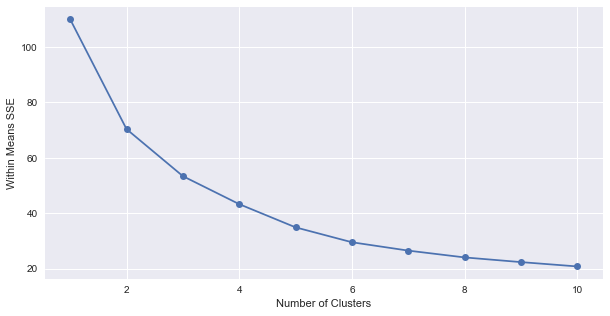

In [98]:
SSE = []
for i in range(1, 11): #tune 
    km = KMeans(n_clusters = i, 
               init='random', 
               n_init=10, 
               max_iter=300)
    y_km = km.fit_predict(df_scaled)
    SSE.append(km.inertia_) #intertia = within means SSE --> variance 

plt.plot(range(1,11), SSE, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Means SSE')
plt.show()

SSE (distortion) changes slope most rapidly at 2 clusters. Let's use this for k. 

In [106]:
km = KMeans(n_clusters = 2, 
           init='random', 
           n_init=10, 
           max_iter=300)
y_km = km.fit_predict(df_scaled)

In [107]:
df['kmeans'] = y_km #add to existing df
df.head(2)

,window_size,up_z,low_z,kmeans
0,120.0,2.36,3.32,0
1,264.0,1.98,3.14,0


Let's plot the clusters against the features to see how the algorithm separated the data out. 

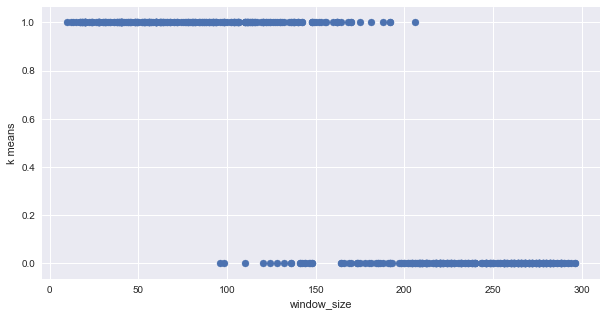

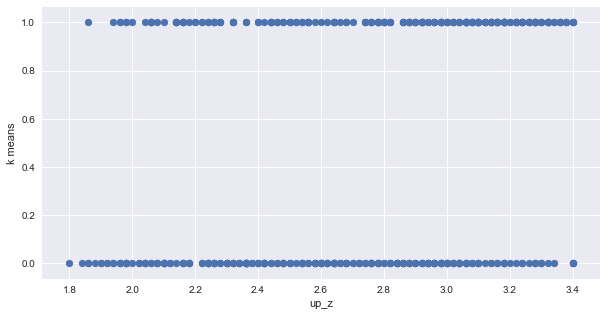

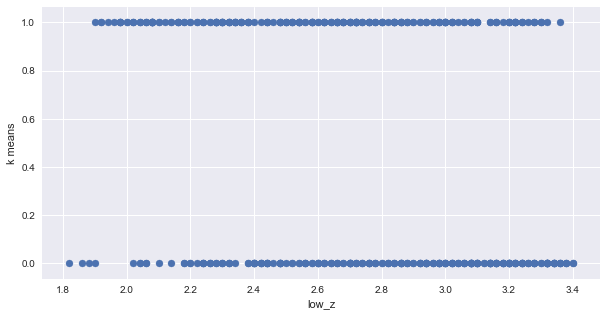

In [108]:
for col in df.columns[:-1]:
    plt.scatter(df[col], df.kmeans)
    plt.ylabel('k means')
    plt.xlabel(col)
    plt.show()